In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [12]:
df=pd.read_csv("Train_data.csv")
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [13]:
str(df["release_date"][0]).replace(' ', '-')

'01-01-1947'

In [14]:
release_date=pd.to_datetime(df.release_date)

df.insert(11, "day", release_date.dt.dayofweek, True) 
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,day,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,2,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,4,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,6,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,1,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,1,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,3,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,6,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,4,0.1180,73.234,0.00558,2017,3.1,high


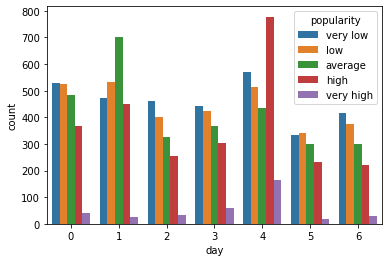

In [15]:
sns.countplot(x=df.day,hue=df.popularity)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

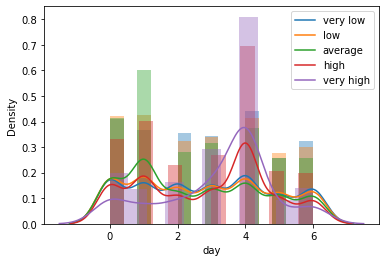

In [16]:
def distWithPopularity(f,p):
    for val in p.unique():
        sns.distplot(f[p==val],label=str(val))
    plt.legend(list(map(str,p.unique())))
    plt.show()



distWithPopularity(df.day,df.popularity)

In [ ]:
import datetime 
import calendar 



In [3]:
df['mode'].replace(to_replace=['Major', 'Minor'], value=[1,0], inplace=True)
df['explicit'].replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,-27.398,1,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,-10.046,1,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,-8.009,0,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,-15.917,1,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,-12.344,1,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,-5.461,1,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,-14.014,1,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,-9.298,0,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,-26.324,1,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [4]:
df["loudness"]= (df["loudness"]-df["loudness"].min())/(df["loudness"].max()-df["loudness"].min())
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [5]:
df.shape

(12227, 17)

In [6]:
df["release_date"][0]

'01-01-1947'

In [7]:
for i in range(df.shape[0]):
  df["release_date"][i]=int(df["release_date"][i][3:5])

df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,1,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,11,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,1,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,4,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,1,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,7,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,1,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,1,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,1,0.1180,73.234,0.00558,2017,3.1,high


In [8]:

vacation=[]
for i in df["release_date"]:
  if i in [12,1]:
    vacation.append(1)
  else :
    vacation.append(0)

df.insert(11, "vacation", vacation, True) 
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,vacation,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,1,1,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,11,0,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,1,1,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,4,0,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,1,1,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,7,0,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,1,1,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,1,1,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,1,1,0.1180,73.234,0.00558,2017,3.1,high


In [9]:

spns=[]
for i in df["speechiness"]:
  if(i>0.6):
    spns.append(1)
  if(i<=0.6):
    spns.append(0)


df.insert(13, "speech_bin", spns, True) 
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,vacation,speechiness,speech_bin,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,1,1,0.0381,0,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,11,0,0.0437,0,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,1,1,0.0474,0,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,4,0,0.0368,0,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,1,1,0.0488,0,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,7,0,0.4070,0,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,1,1,0.0351,0,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,1,1,0.0338,0,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,1,1,0.1180,0,73.234,0.00558,2017,3.1,high


In [ ]:
sns.countplot(x=df.se,hue=df.popularity)

In [11]:
avg=[]
for i,j in df["energy"] , df["loudness"]:
  avg.append((i+j)/2.0)

df.insert(13, "Ene_loud_avg", avg, True) 
df

ValueError: ignored

In [9]:
df['popularity'].replace(to_replace=['very high','high','average','low','very low'], value=[5,4,3,2,1], inplace=True)
df

,id,acousticness,seasons,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,1,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,1,0.0381,110.838,0.03980,1947,3.0,1
1,15901,0.8550,4,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,11,0.0437,152.066,0.85900,2020,2.4,2
2,9002,0.8270,1,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,1,0.0474,108.004,0.70900,1950,2.6,1
3,6734,0.6540,2,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,4,0.0368,83.636,0.96400,1974,2.4,2
4,15563,0.7380,1,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,1,0.0488,117.260,0.78500,1973,3.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,3,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,7,0.4070,81.940,0.74400,2014,3.4,3
12223,1701,0.9120,1,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,1,0.0351,134.009,0.70100,1959,2.0,5
12224,3351,0.3280,1,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,1,0.0338,124.883,0.89000,1984,2.5,2
12225,8879,0.1220,1,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,1,0.1180,73.234,0.00558,2017,3.1,4


In [10]:
df["release_date"]=pd.to_numeric(df["release_date"])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12227 non-null  int64  
 1   acousticness      12227 non-null  float64
 2   seasons           12227 non-null  int64  
 3   danceability      12227 non-null  float64
 4   energy            12227 non-null  float64
 5   explicit          12227 non-null  int64  
 6   instrumentalness  12227 non-null  float64
 7   key               12227 non-null  int64  
 8   liveness          12227 non-null  float64
 9   loudness          12227 non-null  float64
 10  mode              12227 non-null  int64  
 11  release_date      12227 non-null  int64  
 12  speechiness       12227 non-null  float64
 13  tempo             12227 non-null  float64
 14  valence           12227 non-null  float64
 15  year              12227 non-null  int64  
 16  duration-min      12227 non-null  float6

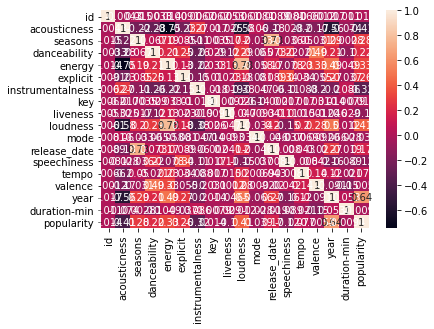

In [12]:
sns.heatmap(df.corr(), annot = True);

In [13]:
df=df.drop("id",axis=1)
df

,acousticness,seasons,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,0.9490,1,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,1,0.0381,110.838,0.03980,1947,3.0,1
1,0.8550,4,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,11,0.0437,152.066,0.85900,2020,2.4,2
2,0.8270,1,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,1,0.0474,108.004,0.70900,1950,2.6,1
3,0.6540,2,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,4,0.0368,83.636,0.96400,1974,2.4,2
4,0.7380,1,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,1,0.0488,117.260,0.78500,1973,3.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.0408,3,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,7,0.4070,81.940,0.74400,2014,3.4,3
12223,0.9120,1,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,1,0.0351,134.009,0.70100,1959,2.0,5
12224,0.3280,1,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,1,0.0338,124.883,0.89000,1984,2.5,2
12225,0.1220,1,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,1,0.1180,73.234,0.00558,2017,3.1,4


In [14]:
from numpy import mean
from numpy import std

# load the dataset
def load_dataset(df):
	# load the dataset as a numpy array
	data = df
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

# load the dataset
X, y = load_dataset(df)
#splitting datat as train and evaluation 

# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance


In [15]:
from numpy import mean
from numpy import std

print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.629 (0.008)


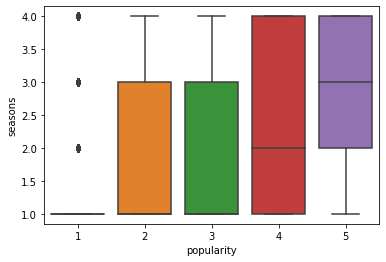

In [19]:
sns.boxplot(y=df["seasons"],x=df.popularity)

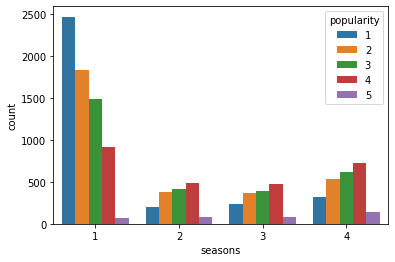

In [20]:
sns.countplot(x=df.seasons,hue=df.popularity)

In [16]:
n=0
for i in df["popularity"]:
  if i==5:
    n=n+1

n

369

In [17]:
grouped = df.groupby(df.popularity) 
df_1 = grouped.get_group(1) 
df_2=grouped.get_group(2) 
df_3 = grouped.get_group(3) 
df_4 = grouped.get_group(4) 
df_5 = grouped.get_group(5) 

df_5

,acousticness,seasons,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
51,0.0239,3,0.849,0.536,1,0.000000,1,0.126,0.814210,1,8,0.3490,141.964,0.308,2020,2.0,5
76,0.6620,4,0.657,0.540,0,0.000000,5,0.123,0.805985,1,11,0.0287,136.970,0.625,2020,2.7,5
81,0.0663,1,0.613,0.631,1,0.000000,4,0.169,0.821853,1,12,0.1200,149.992,0.330,2020,2.6,5
103,0.4010,4,0.731,0.573,1,0.000052,4,0.113,0.752704,0,11,0.0544,109.928,0.145,2020,3.4,5
145,0.4060,1,0.682,0.700,0,0.000000,6,0.174,0.852561,1,1,0.0397,120.030,0.637,2020,3.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12083,0.4180,1,0.546,0.613,0,0.000000,7,0.103,0.807907,0,12,0.0264,79.015,0.535,2020,3.6,5
12139,0.4270,4,0.665,0.697,0,0.000014,9,0.599,0.869815,0,10,0.1540,94.053,0.556,2020,3.6,5
12167,0.3120,4,0.662,0.714,0,0.000000,5,0.179,0.850572,0,10,0.1210,147.997,0.464,2017,3.5,5
12215,0.6070,4,0.795,0.178,0,0.000000,0,0.623,0.709525,1,9,0.0574,93.982,0.608,2018,3.0,5


In [18]:
def load_data(df_1,df_2,df_3,df_4,df_5):
  
  df_1 = df_1.sample(frac = 1)
  df_2 = df_2.sample(frac = 1)
  df_3 = df_3.sample(frac = 1)
  df_4 = df_4.sample(frac = 1)
  frames=[df_1[:][:369],df_2[:][:369],df_3[:][:369],df_4[:][:369],df_5[:][:369]]
  data_369=pd.concat(frames)
  data_369=data_369.sample(frac=1)
	data_369 = data_369.values
	# split into input and output elements
	X, y = data_369[:, :-1], data_369[:, -1]
	# label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y

for i in range(50):
  X_369,y_369=load_data(df_1,df_2,df_3,df_4,df_5)


TabError: ignored

In [2]:
import numpy as np

def revenue(y_pred,y_act,am):
  rev=0
  bid=[5,4,3,2,1]
  for k in bid:
    for i in range(y_pred.shape[0]):
      if (y_pred[i]==k and am>=k):
        am=am-k
        if(y_pred[i]>=y_act[i]):
          rev=rev+(2*y_act[i] )
    if (am==0): break
  return rev
        


pred=np.array([5,3,3,2,1,2,5,5,1])
act=np.array([3,4,4,3,5,2,5,4,2])
a=20
print(revenue(pred,act,a))

24


In [ ]:
pred[1]